# Multiple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

## Importing the dataset

In [2]:
ds=pd.read_csv("insurance.csv")

In [3]:
ds.isnull().sum()

age         0
sex         0
bmi         9
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:xlabel='bmi', ylabel='Count'>

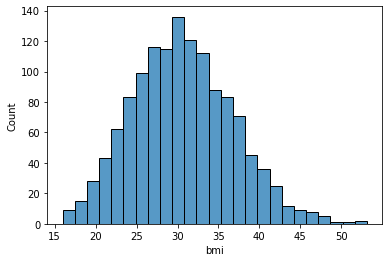

In [4]:
sns.histplot(ds['bmi'])

## Update the Missing Values

In [5]:
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
ds['bmi']=imputer.fit_transform(ds[['bmi']])

In [6]:
ds.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Split the dataset into independent and Dependent variables

In [7]:
ds.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
#X=ds.iloc[::-1].values
#y=ds.iloc[:-1].values

In [9]:
X=ds[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y=ds[['charges']]

## Handling Categorical Variables

In [10]:
X=pd.get_dummies(ds[['age','sex','bmi','children','smoker','region',]],drop_first=True)

In [11]:
X.head()

#female = 0
#male = 1

#smoke yes = 1
#smoke no = 0

#northeast = 0 0 0
#northwest = 1 0 0
#southeast = 0 1 0
#southwest = 0 0 1

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


## Splitting the dataset into the Training set and Test set

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)

## Training the Multiple Linear Regression model on the Training set

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

## Intercept and Coefficient

In [15]:
print("Coefficioents",regressor.coef_)

Coefficioents [[  249.62124784   323.77531602   569.32626665   167.33140693
  23394.51608691  -496.48378452  -977.49146762  -952.27496265]]


In [16]:
print("Intercept",regressor.intercept_)

Intercept [-11410.82511061]


## Predicting the Test set results

In [17]:
y_pred=regressor.predict(X_test)

## Validation case scenario:
#### case1. Predict how much a person of age 53, bmi 36.6, 3 children, male, non smoker, from south-west how much need to pay? 

In [18]:
regressor.predict([[53,36.6,3,1,0,0,0,1]])

array([[14592.31283557]])

#### case4. Predict how much a person of age 50, bmi 27.075, 1 children, female, nonsmoker, from north-east how much need to pay?  

In [19]:
regressor.predict([[50,27.075,1,0,0,0,0,0]])

array([[10405.78022933]])

In [20]:
#Case2
regressor.predict([[62,37.4,0,1,0,0,0,1]])

array([[15389.94551897]])

In [21]:
#Case3
regressor.predict([[19,35.4,0,1,0,0,0,1]])

array([[4008.68122986]])

### Calculate R-Square

In [22]:
from sklearn.metrics import r2_score
print('r2-score',r2_score(y_test,y_pred))

r2-score 0.7992495729209455


## Backward elimination is an advanced technique for feature selection to select optimal number of features. Sometimes using all features can cause slowness or other performance issues in your machine learning model.
### Backward Elimination consists of the following steps:

- Select a significance level to stay in the model (eg. SL = 0.05)
- Fit the model with all possible predictors
- Consider the predictor with the highest P-value. If P>SL, go to point d.
- Remove the predictor
- Fit the model without this variable and repeat the step c until the condition becomes false.

## Backward Elimination is irrelevant in Python while using Scikit-Learn library as it automatically takes care of selecting the statistically significant features when training the model to make accurate predictions.
## In case of Statistical Model, you will need to do remove unnecessary variables manually.

In [28]:
import statsmodels.api as sm
X=sm.add_constant(X)

In [38]:
model=sm.OLS(y,X).fit()

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     499.0
Date:                Thu, 17 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:11:20   Log-Likelihood:                -13509.
No. Observations:                1334   AIC:                         2.704e+04
Df Residuals:                    1325   BIC:                         2.708e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -1.2e+04    992.860    -12.088      0.000   -1.39e+04   -1.01e+04
age                257.2548     11.938     21.549      0.000     233.835     280.675
bmi                340.8240     28.730     11.863      0.000     284.462     397.186
children           470.3125    138.201      3.403      0.001     199.195     741.430
sex_male          -118.0621    333.860     -0.354      0.724    -773.015     536.891
smoker_yes        2.385e+04    413.840     57.621      0.000     2.3e+04    2.47e+04
region_northwest  -356.3989    477.269     -0.747      0.455   -1292.685     579.887
region_southeast -1042.5342    479.697     -2.173      0.030   -1983.582    -101.486
region_southwest  -920.0916    479.778     -1.918      0.055   -1861.298      21.115
==============================================================================
Omnibus:                      298.053   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              709.326
Skew:                           1.208   Prob(JB):                    9.37e-155
Kurtosis:                       5.632   Cond. No.                         312.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
X.columns

Index(['const', 'age', 'bmi', 'children', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [43]:
X1=X[['const', 'age', 'bmi', 'children','smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest']]

In [45]:
sm.OLS(y,X1).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     570.7
Date:                Thu, 17 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:14:31   Log-Likelihood:                -13509.
No. Observations:                1334   AIC:                         2.703e+04
Df Residuals:                    1326   BIC:                         2.708e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.205e+04    983.430    -12.252      0.000    -1.4e+04   -1.01e+04
age                257.3600     11.931     21.571      0.000     233.955     280.765
bmi                340.3759     28.693     11.863      0.000     284.088     396.664
children           469.4637    138.135      3.399      0.001     198.477     740.450
smoker_yes        2.383e+04    412.513     57.780      0.000     2.3e+04    2.46e+04
region_northwest  -355.5249    477.105     -0.745      0.456   -1291.489     580.439
region_southeast -1041.8798    479.535     -2.173      0.030   -1982.609    -101.150
region_southwest  -918.8281    479.606     -1.916      0.056   -1859.698      22.041
==============================================================================
Omnibus:                      298.385   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              710.791
Skew:                           1.209   Prob(JB):                    4.51e-155
Kurtosis:                       5.635   Cond. No.                         309.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
X2=X[['const', 'age', 'bmi', 'children','smoker_yes', 'region_southeast', 'region_southwest']]

In [47]:
sm.OLS(y,X2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     665.9
Date:                Thu, 17 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:16:22   Log-Likelihood:                -13509.
No. Observations:                1334   AIC:                         2.703e+04
Df Residuals:                    1327   BIC:                         2.707e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.223e+04    954.195    -12.812      0.000   -1.41e+04   -1.04e+04
age                257.3855     11.929     21.577      0.000     233.984     280.787
bmi                340.3554     28.688     11.864      0.000     284.077     396.634
children           466.4161    138.051      3.379      0.001     195.594     737.238
smoker_yes        2.384e+04    412.311     57.827      0.000     2.3e+04    2.47e+04
region_southeast  -864.0674    415.880     -2.078      0.038   -1679.922     -48.213
region_southwest  -740.2565    415.376     -1.782      0.075   -1555.122      74.609
==============================================================================
Omnibus:                      297.785   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              706.924
Skew:                           1.208   Prob(JB):                    3.11e-154
Kurtosis:                       5.623   Cond. No.                         295.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
X3=X[['const', 'age', 'bmi', 'children','smoker_yes', 'region_southeast',]]

In [49]:
sm.OLS(y,X3).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     797.2
Date:                Thu, 17 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:17:27   Log-Likelihood:                -13511.
No. Observations:                1334   AIC:                         2.703e+04
Df Residuals:                    1328   BIC:                         2.706e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.234e+04    952.824    -12.951      0.000   -1.42e+04   -1.05e+04
age                257.5041     11.938     21.570      0.000     234.084     280.924
bmi                335.8256     28.598     11.743      0.000     279.722     391.929
children           463.0809    138.152      3.352      0.001     192.062     734.100
smoker_yes        2.385e+04    412.620     57.805      0.000     2.3e+04    2.47e+04
region_southeast  -602.1337    389.361     -1.546      0.122   -1365.963     161.696
==============================================================================
Omnibus:                      300.456   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              716.837
Skew:                           1.216   Prob(JB):                    2.19e-156
Kurtosis:                       5.642   Cond. No.                         295.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
X4=X[['const', 'age', 'bmi', 'children','smoker_yes',]]

In [51]:
sm.OLS(y,X4).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     994.9
Date:                Thu, 17 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:17:58   Log-Likelihood:                -13512.
No. Observations:                1334   AIC:                         2.703e+04
Df Residuals:                    1329   BIC:                         2.706e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.216e+04    945.827    -12.851      0.000    -1.4e+04   -1.03e+04
age          258.2273     11.935     21.636      0.000     234.813     281.641
bmi          323.6029     27.499     11.768      0.000     269.657     377.549
children     468.9803    138.171      3.394      0.001     197.923     740.038
smoker_yes  2.381e+04    411.865     57.804      0.000     2.3e+04    2.46e+04
==============================================================================
Omnibus:                      298.996   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              711.979
Skew:                           1.211   Prob(JB):                    2.49e-155
Kurtosis:                       5.634   Cond. No.                         292.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""